In [7]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ants
import random

from src.custom_padding import CustomPadding
from src.utils import get_mask


In [8]:
dir_data = Path("/media/maichi/T7/ATLAS REGISTERED CERCARE BY PADDING")
assert dir_data.exists(), f"{str(dir_data)} does not exist !"

list_patients = os.listdir(dir_data)
list_patients = [list_patients[i] for i in np.argsort([int(patient.strip("AIDREAM_")) for patient in  list_patients])]

print(fr'Number of patients: {len(list_patients)}')


Number of patients: 186


In [9]:
# Function to compute the KL divergence :
def compute_kl_divergence(hist_p, hist_q):

    # Compute the KL divergence :
    kl_divergence = np.sum(hist_p * np.log(hist_p / hist_q))

    return kl_divergence

# Function to compute the JS divergence :
def compute_js_divergence(hist_p, hist_q):

    # Compute the mean histogram :
    hist_m = 0.5 * (hist_p + hist_q)

    # Compute the JS divergence :
    js_divergence = 0.5 * (compute_kl_divergence(hist_p, hist_m) + compute_kl_divergence(hist_q, hist_m))

    return js_divergence



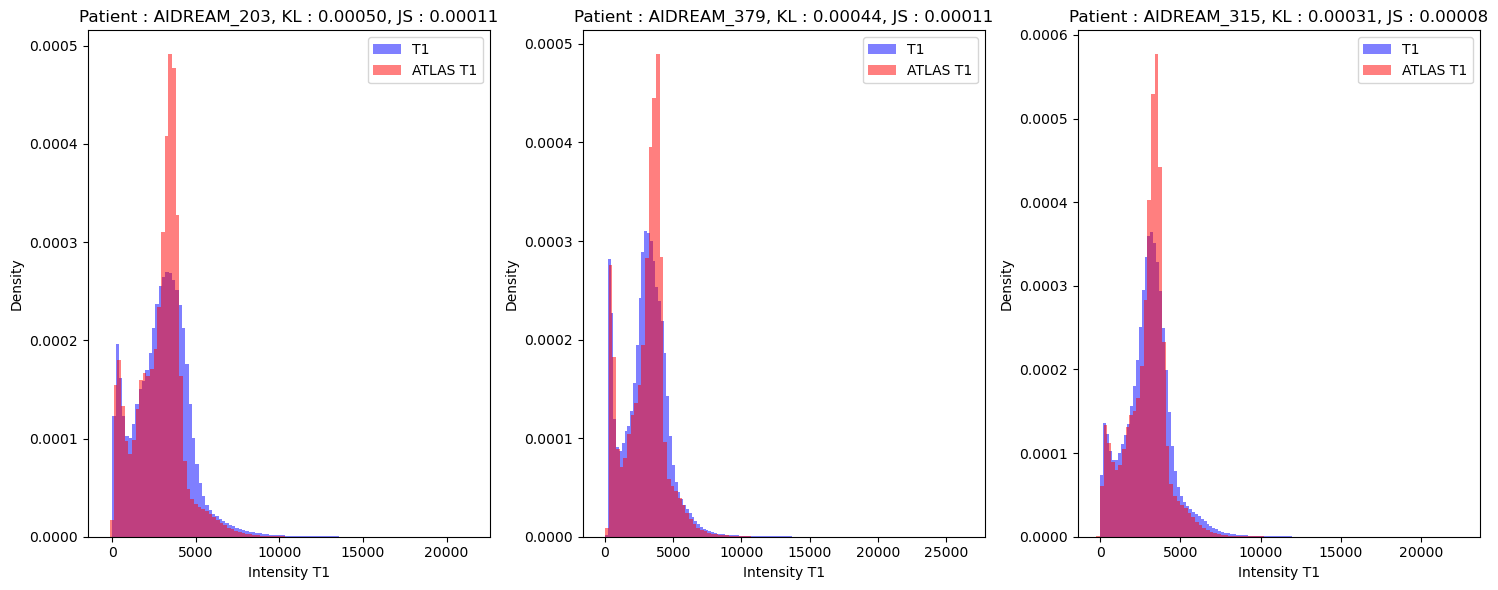

In [10]:
# Plot the histogram of the T1 and the ATLAS T1  for 3 random patients :
np.random.seed(123)
selected_patients = np.random.choice(list_patients, 3, replace=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, name in enumerate(selected_patients):

    # Create patient object :
    patient = CustomPadding(name)

    # Load the T1, and its mask :
    t1 = patient.get_t1()
    mask_t1 = get_mask(t1.numpy())
    t1_values = t1[mask_t1 == 1].flatten()

    # Load the ATLAS T1, and its mask :
    atlas_t1 = patient.get_atlas_t1()
    mask_atlas_t1 = get_mask(atlas_t1.numpy())
    atlas_t1_values = atlas_t1[mask_atlas_t1 == 1].flatten()

    # Compute the histograms :
    hist_t1, bins_t1 = np.histogram(t1_values, bins=100, density=True)
    hist_atlas_t1, _ = np.histogram(atlas_t1_values, bins=bins_t1, density=True)

    # Avoid log(0) issues :
    epsilon = 1e-10
    hist_t1 += epsilon
    hist_atlas_t1 += epsilon

    # Compute the KL and JS divergences :
    kl_divergence = compute_kl_divergence(hist_t1, hist_atlas_t1)
    js_divergence = compute_js_divergence(hist_t1, hist_atlas_t1)

    # Plot the histograms :
    axes[i].hist(t1_values, bins=100, alpha=0.5, density=True, label="T1", color="b")
    axes[i].hist(atlas_t1_values, bins=100, alpha=0.5, density=True, label="ATLAS T1", color="r")

    # Add the title :
    axes[i].set_title(f"Patient : {name}, KL : {kl_divergence:.5f}, JS : {js_divergence:.5f}")
    axes[i].set_xlabel("Intensity T1")
    axes[i].set_ylabel("Density")
    axes[i].legend()

# Adjust the layout :
plt.tight_layout()
plt.show()


In [6]:
selected_patients = ["AIDREAM_202", "AIDREAM_242", "AIDREAM_94"]

In [36]:
# Compute the KL and JS divergences for all patients :
df_t1_divergences = pd.DataFrame(columns=["patient", "KL", "JS"])

for i, name in enumerate(list_patients):

    print(f"Processing patient {name} : {i+1}/{len(list_patients)}")

    # Create patient object :
    patient = CustomPadding(name)

    # Load the T1, and its mask :
    t1 = patient.get_t1()
    mask_t1 = get_mask(t1.numpy())
    t1_values = t1[mask_t1 == 1].flatten()

    # Load the ATLAS T1, and its mask :
    atlas_t1 = patient.get_atlas_t1()
    mask_atlas_t1 = get_mask(atlas_t1.numpy())
    atlas_t1_values = atlas_t1[mask_atlas_t1 == 1].flatten()

    # Compute the histograms :
    hist_t1, bins_t1 = np.histogram(t1_values, bins=100, density=True)
    hist_atlas_t1, _ = np.histogram(atlas_t1_values, bins=bins_t1, density=True)

    # Avoid log(0) issues :
    epsilon = 1e-10
    hist_t1 += epsilon
    hist_atlas_t1 += epsilon

    # Compute the KL and JS divergences :
    kl_divergence = compute_kl_divergence(hist_t1, hist_atlas_t1)
    js_divergence = compute_js_divergence(hist_t1, hist_atlas_t1)

    df_t1_divergences.loc[len(df_t1_divergences)] = [name, kl_divergence, js_divergence]

df_t1_divergences.to_csv("/home/maichi/work/my_projects/AIDREAM/padding_cercare/data/t1_divergences.csv", index=False)


Processing patient AIDREAM_1 : 1/186
Processing patient AIDREAM_2 : 2/186
Processing patient AIDREAM_3 : 3/186
Processing patient AIDREAM_4 : 4/186
Processing patient AIDREAM_6 : 5/186
Processing patient AIDREAM_7 : 6/186
Processing patient AIDREAM_9 : 7/186
Processing patient AIDREAM_10 : 8/186
Processing patient AIDREAM_11 : 9/186
Processing patient AIDREAM_12 : 10/186
Processing patient AIDREAM_13 : 11/186
Processing patient AIDREAM_14 : 12/186
Processing patient AIDREAM_15 : 13/186
Processing patient AIDREAM_16 : 14/186
Processing patient AIDREAM_17 : 15/186
Processing patient AIDREAM_19 : 16/186
Processing patient AIDREAM_20 : 17/186
Processing patient AIDREAM_21 : 18/186
Processing patient AIDREAM_22 : 19/186
Processing patient AIDREAM_24 : 20/186
Processing patient AIDREAM_26 : 21/186
Processing patient AIDREAM_28 : 22/186
Processing patient AIDREAM_31 : 23/186
Processing patient AIDREAM_32 : 24/186
Processing patient AIDREAM_33 : 25/186
Processing patient AIDREAM_34 : 26/186
Pr

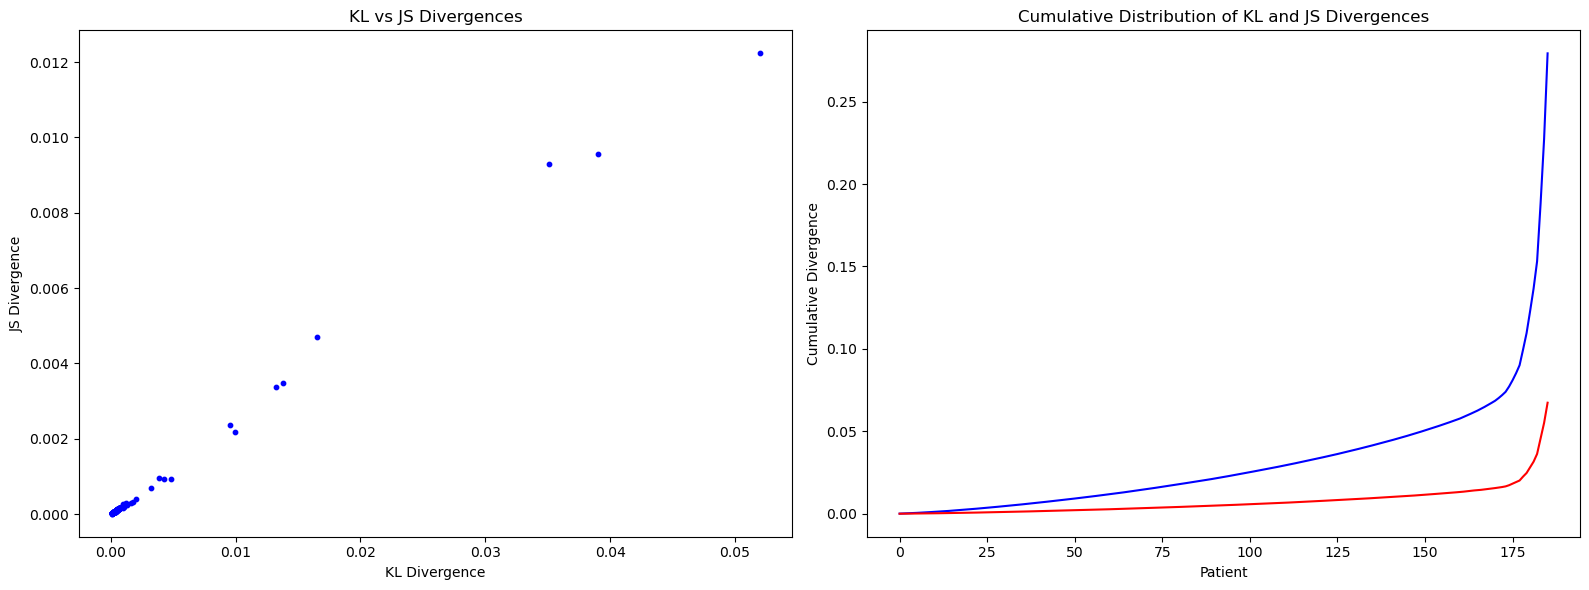

In [58]:
# Plot the KL and JS divergences :
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot KL vs JS divergences :
axes[0].scatter(df_t1_divergences["KL"], df_t1_divergences["JS"], color="b", s=10)
axes[0].set_title("KL vs JS Divergences")
axes[0].set_xlabel("KL Divergence")
axes[0].set_ylabel("JS Divergence")

# Second, plot the cumulative distribution of the KL and JS divergences :
df_sorted = df_t1_divergences.sort_values("KL").reset_index(drop=True)
df_sorted["KL"].cumsum().plot(ax=axes[1], color="b", label="KL Divergence")
df_sorted["JS"].cumsum().plot(ax=axes[1], color="r", label="JS Divergence")

axes[1].set_title("Cumulative Distribution of KL and JS Divergences")
axes[1].set_xlabel("Patient")
axes[1].set_ylabel("Cumulative Divergence")

# Adjust the layout :
plt.tight_layout()
plt.show()


In [44]:
df_t1_divergences.sort_values("KL", ascending=False).head(10)

,patient,KL,JS
175,AIDREAM_375,0.051967,0.012230
83,AIDREAM_117,0.039059,0.009553
132,AIDREAM_306,0.035131,0.009283
59,AIDREAM_84,0.016532,0.004702
144,AIDREAM_323,0.013771,0.003493
85,AIDREAM_120,0.013245,0.003368
73,AIDREAM_103,0.009966,0.002186
152,AIDREAM_342,0.009552,0.002380
142,AIDREAM_320,0.004820,0.000944
130,AIDREAM_248,0.004276,0.000943


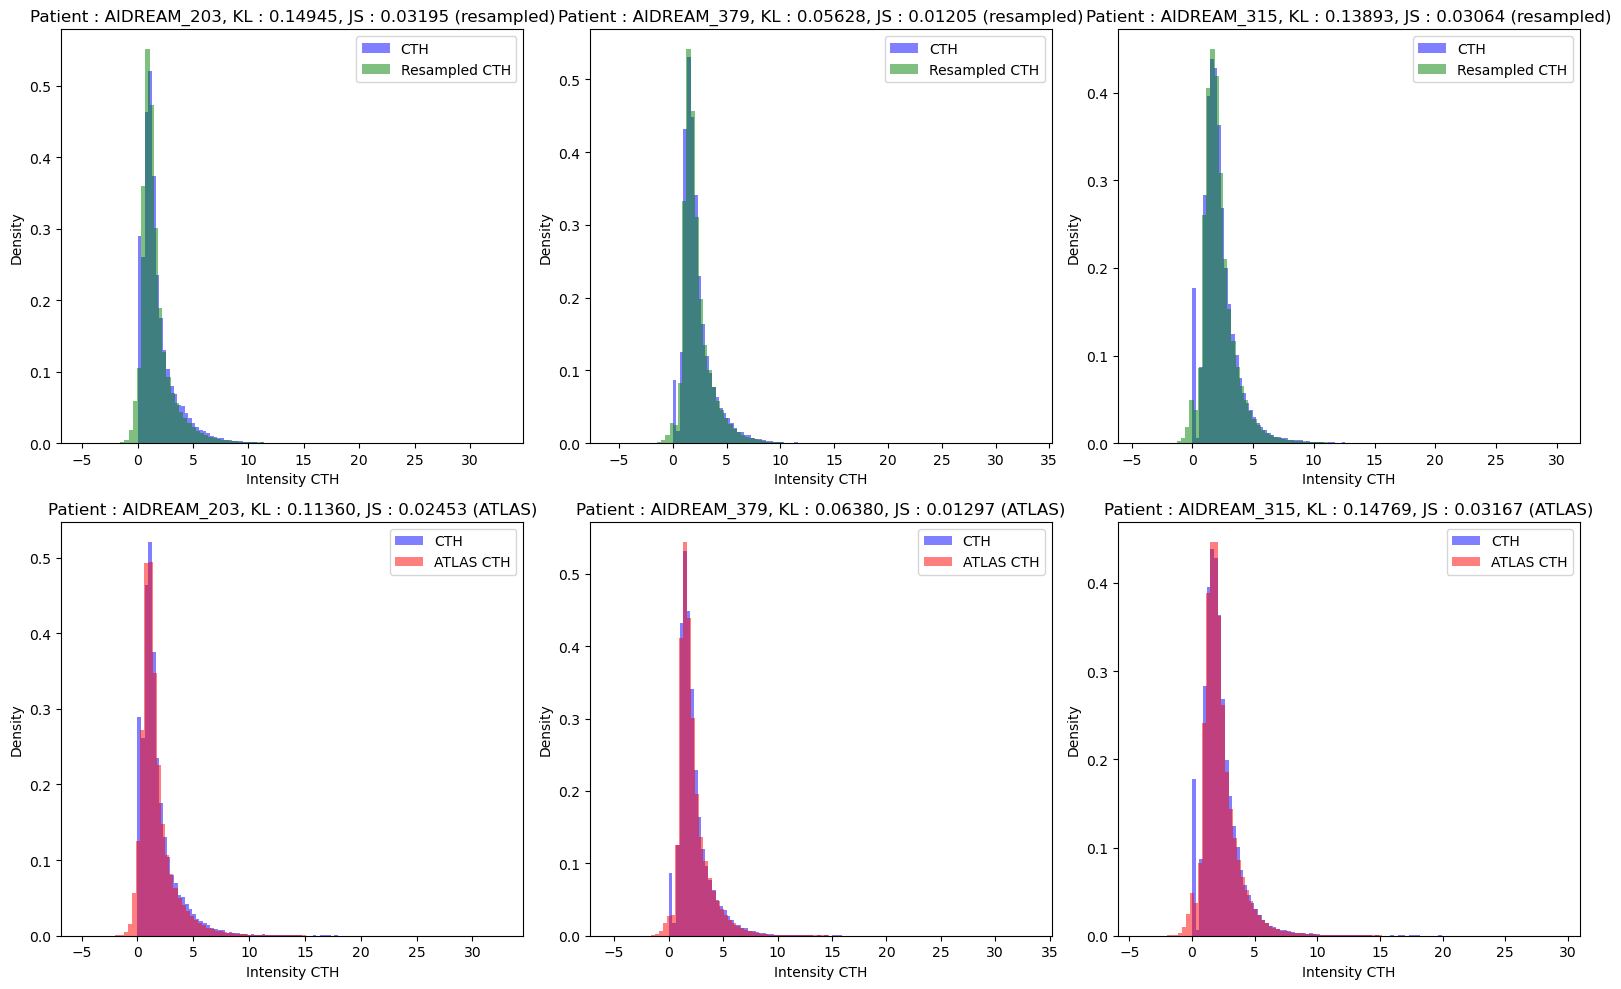

In [15]:
# Plot the histogram of the CTH, the resampled CTH, and the ATLAS CTH for 3 random patients :
_, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, name in enumerate(selected_patients):

    # Create patient object :
    patient = CustomPadding(name)

    # Load the CTH, and its mask :
    cth = patient.get_biomarker("CTH")
    mask_cth = get_mask(cth.numpy())
    cth_values = cth[mask_cth == 1].flatten()

    # Load the resampled CTH, and its mask :
    cth_resampled = patient.get_resampled_biomarker("CTH")
    mask_cth_resampled = get_mask(cth_resampled.numpy())
    cth_resampled_values = cth_resampled[mask_cth_resampled == 1].flatten()

    # Load the ATLAS CTH, and its mask :
    atlas_cth = patient.get_atlas_biomarker("CTH")
    mask_atlas_cth = get_mask(atlas_cth.numpy())
    atlas_cth_values = atlas_cth[mask_atlas_cth == 1].flatten()

    # Compute the histograms :
    hist_cth, bins_cth = np.histogram(cth_values, bins=100, density=True)
    hist_cth_resampled, _ = np.histogram(cth_resampled_values, bins=bins_cth, density=True)
    hist_atlas_cth, _ = np.histogram(atlas_cth_values, bins=bins_cth, density=True)

    # Avoid log(0) issues :
    epsilon = 1e-10
    hist_cth += epsilon
    hist_cth_resampled += epsilon
    hist_atlas_cth += epsilon

    # Compute the KL and JS divergences :
    kl_divergence_1 = compute_kl_divergence(hist_cth, hist_cth_resampled)
    kl_divergence_2 = compute_kl_divergence(hist_cth, hist_atlas_cth)
    js_divergence_1 = compute_js_divergence(hist_cth, hist_cth_resampled)
    js_divergence_2 = compute_js_divergence(hist_cth, hist_atlas_cth)

    # Plot the histograms :
    axes[0, i].hist(cth_values, bins=100, alpha=0.5, density=True, label="CTH", color="b")
    axes[0, i].hist(cth_resampled_values, bins=100, alpha=0.5, density=True, label="Resampled CTH", color="g")

    axes[1, i].hist(cth_values, bins=100, alpha=0.5, density=True, label="CTH", color="b")
    axes[1, i].hist(atlas_cth_values, bins=100, alpha=0.5, density=True, label="ATLAS CTH", color="r")

    # Add the title :
    axes[0, i].set_title(f"Patient : {name}, KL : {kl_divergence_1:.5f}, JS : {js_divergence_1:.5f} (resampled)")
    axes[0, i].set_xlabel("Intensity CTH")
    axes[0, i].set_ylabel("Density")
    axes[0, i].legend()

    axes[1, i].set_title(f"Patient : {name}, KL : {kl_divergence_2:.5f}, JS : {js_divergence_2:.5f} (ATLAS)")
    axes[1, i].set_xlabel("Intensity CTH")
    axes[1, i].set_ylabel("Density")
    axes[1, i].legend()

# Adjust the layout :
plt.tight_layout()
plt.show()



In [16]:
# Compute the KL and JS divergences for all patients and all biomarkers :
list_biomarkers = ["CTH", 'COV', 'rCBV', 'rCMRO2', 'OEF', 'Delay', 'rLeakage']

df_biomarkers_divergences = pd.DataFrame(columns=["patient", "biomarker", "type", "KL", "JS"])

for i, name in enumerate(list_patients):

    print(f"Processing patient {name} : {i+1}/{len(list_patients)}")

    # Create patient object :
    patient = CustomPadding(name)

    for biomarker in list_biomarkers:

        # Load the biomarker, and its mask :
        biomarker_image = patient.get_biomarker(biomarker)
        mask_biomarker = get_mask(biomarker_image.numpy())
        biomarker_values = biomarker_image[mask_biomarker == 1].flatten()

        # Load the resampled biomarker, and its mask :
        biomarker_resampled = patient.get_resampled_biomarker(biomarker)
        mask_biomarker_resampled = get_mask(biomarker_resampled.numpy())
        biomarker_resampled_values = biomarker_resampled[mask_biomarker_resampled == 1].flatten()

        # Load the ATLAS biomarker, and its mask :
        atlas_biomarker = patient.get_atlas_biomarker(biomarker)
        mask_atlas_biomarker = get_mask(atlas_biomarker.numpy())
        atlas_biomarker_values = atlas_biomarker[mask_atlas_biomarker == 1].flatten()

        # Compute the histograms :
        hist_biomarker, bins_biomarker = np.histogram(biomarker_values, bins=100, density=True)
        hist_biomarker_resampled, _ = np.histogram(biomarker_resampled_values, bins=bins_biomarker, density=True)
        hist_atlas_biomarker, _ = np.histogram(atlas_biomarker_values, bins=bins_biomarker, density=True)

        # Avoid log(0) issues :
        epsilon = 1e-10
        hist_biomarker += epsilon
        hist_biomarker_resampled += epsilon
        hist_atlas_biomarker += epsilon

        # Compute the KL and JS divergences :
        kl_divergence_1 = compute_kl_divergence(hist_biomarker, hist_biomarker_resampled)
        kl_divergence_2 = compute_kl_divergence(hist_biomarker, hist_atlas_biomarker)

        js_divergence_1 = compute_js_divergence(hist_biomarker, hist_biomarker_resampled)
        js_divergence_2 = compute_js_divergence(hist_biomarker, hist_atlas_biomarker)

        df_biomarkers_divergences.loc[len(df_biomarkers_divergences)] = [name, biomarker, "resampled", kl_divergence_1, js_divergence_1]
        df_biomarkers_divergences.loc[len(df_biomarkers_divergences)] = [name, biomarker, "atlas", kl_divergence_2, js_divergence_2]

df_biomarkers_divergences.to_csv("/home/maichi/work/my_projects/AIDREAM/padding_cercare/data/biomarkers_divergences.csv", index=False)


Processing patient AIDREAM_1 : 1/186
Processing patient AIDREAM_2 : 2/186
Processing patient AIDREAM_3 : 3/186
Processing patient AIDREAM_4 : 4/186
Processing patient AIDREAM_6 : 5/186
Processing patient AIDREAM_7 : 6/186
Processing patient AIDREAM_9 : 7/186
Processing patient AIDREAM_10 : 8/186
Processing patient AIDREAM_11 : 9/186
Processing patient AIDREAM_12 : 10/186
Processing patient AIDREAM_13 : 11/186
Processing patient AIDREAM_14 : 12/186
Processing patient AIDREAM_15 : 13/186
Processing patient AIDREAM_16 : 14/186
Processing patient AIDREAM_17 : 15/186
Processing patient AIDREAM_19 : 16/186
Processing patient AIDREAM_20 : 17/186
Processing patient AIDREAM_21 : 18/186
Processing patient AIDREAM_22 : 19/186
Processing patient AIDREAM_24 : 20/186
Processing patient AIDREAM_26 : 21/186
Processing patient AIDREAM_28 : 22/186


/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_31 : 23/186
Processing patient AIDREAM_32 : 24/186
Processing patient AIDREAM_33 : 25/186
Processing patient AIDREAM_34 : 26/186
Processing patient AIDREAM_35 : 27/186
Processing patient AIDREAM_36 : 28/186
Processing patient AIDREAM_38 : 29/186
Processing patient AIDREAM_39 : 30/186
Processing patient AIDREAM_41 : 31/186
Processing patient AIDREAM_44 : 32/186
Processing patient AIDREAM_45 : 33/186
Processing patient AIDREAM_46 : 34/186
Processing patient AIDREAM_48 : 35/186
Processing patient AIDREAM_49 : 36/186
Processing patient AIDREAM_50 : 37/186
Processing patient AIDREAM_51 : 38/186
Processing patient AIDREAM_52 : 39/186
Processing patient AIDREAM_53 : 40/186
Processing patient AIDREAM_54 : 41/186
Processing patient AIDREAM_56 : 42/186
Processing patient AIDREAM_59 : 43/186
Processing patient AIDREAM_60 : 44/186
Processing patient AIDREAM_61 : 45/186
Processing patient AIDREAM_62 : 46/186
Processing patient AIDREAM_64 : 47/186
Processing patient AIDREA

/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_69 : 51/186
Processing patient AIDREAM_71 : 52/186
Processing patient AIDREAM_72 : 53/186
Processing patient AIDREAM_73 : 54/186
Processing patient AIDREAM_75 : 55/186
Processing patient AIDREAM_76 : 56/186
Processing patient AIDREAM_80 : 57/186
Processing patient AIDREAM_81 : 58/186
Processing patient AIDREAM_82 : 59/186
Processing patient AIDREAM_84 : 60/186


/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_85 : 61/186
Processing patient AIDREAM_88 : 62/186
Processing patient AIDREAM_89 : 63/186
Processing patient AIDREAM_90 : 64/186
Processing patient AIDREAM_92 : 65/186
Processing patient AIDREAM_93 : 66/186
Processing patient AIDREAM_94 : 67/186


/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_96 : 68/186


/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_97 : 69/186
Processing patient AIDREAM_98 : 70/186
Processing patient AIDREAM_99 : 71/186
Processing patient AIDREAM_100 : 72/186
Processing patient AIDREAM_102 : 73/186
Processing patient AIDREAM_103 : 74/186
Processing patient AIDREAM_104 : 75/186
Processing patient AIDREAM_106 : 76/186


/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_109 : 77/186
Processing patient AIDREAM_110 : 78/186
Processing patient AIDREAM_112 : 79/186
Processing patient AIDREAM_113 : 80/186


/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_114 : 81/186
Processing patient AIDREAM_115 : 82/186
Processing patient AIDREAM_116 : 83/186
Processing patient AIDREAM_117 : 84/186
Processing patient AIDREAM_118 : 85/186
Processing patient AIDREAM_120 : 86/186
Processing patient AIDREAM_122 : 87/186
Processing patient AIDREAM_123 : 88/186
Processing patient AIDREAM_124 : 89/186
Processing patient AIDREAM_126 : 90/186
Processing patient AIDREAM_127 : 91/186
Processing patient AIDREAM_128 : 92/186
Processing patient AIDREAM_129 : 93/186
Processing patient AIDREAM_130 : 94/186
Processing patient AIDREAM_132 : 95/186
Processing patient AIDREAM_133 : 96/186
Processing patient AIDREAM_135 : 97/186
Processing patient AIDREAM_136 : 98/186
Processing patient AIDREAM_137 : 99/186
Processing patient AIDREAM_139 : 100/186
Processing patient AIDREAM_140 : 101/186
Processing patient AIDREAM_142 : 102/186
Processing patient AIDREAM_143 : 103/186
Processing patient AIDREAM_145 : 104/186
Processing patient AIDREAM_146 : 10

/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_312 : 138/186
Processing patient AIDREAM_314 : 139/186
Processing patient AIDREAM_315 : 140/186
Processing patient AIDREAM_317 : 141/186
Processing patient AIDREAM_319 : 142/186
Processing patient AIDREAM_320 : 143/186
Processing patient AIDREAM_322 : 144/186
Processing patient AIDREAM_323 : 145/186
Processing patient AIDREAM_326 : 146/186
Processing patient AIDREAM_327 : 147/186
Processing patient AIDREAM_328 : 148/186
Processing patient AIDREAM_329 : 149/186
Processing patient AIDREAM_331 : 150/186
Processing patient AIDREAM_332 : 151/186
Processing patient AIDREAM_341 : 152/186
Processing patient AIDREAM_342 : 153/186
Processing patient AIDREAM_343 : 154/186
Processing patient AIDREAM_344 : 155/186
Processing patient AIDREAM_345 : 156/186
Processing patient AIDREAM_346 : 157/186
Processing patient AIDREAM_348 : 158/186
Processing patient AIDREAM_349 : 159/186
Processing patient AIDREAM_356 : 160/186
Processing patient AIDREAM_357 : 161/186
Processing patie

/home/maichi/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:

invalid value encountered in divide



Processing patient AIDREAM_373 : 174/186
Processing patient AIDREAM_374 : 175/186
Processing patient AIDREAM_375 : 176/186
Processing patient AIDREAM_378 : 177/186
Processing patient AIDREAM_379 : 178/186
Processing patient AIDREAM_380 : 179/186
Processing patient AIDREAM_381 : 180/186
Processing patient AIDREAM_382 : 181/186
Processing patient AIDREAM_385 : 182/186
Processing patient AIDREAM_390 : 183/186
Processing patient AIDREAM_391 : 184/186
Processing patient AIDREAM_394 : 185/186
Processing patient AIDREAM_400 : 186/186


In [18]:
df_biomarkers_divergences.sort_values(by="KL", ascending=False).head(10)

,patient,biomarker,type,KL,JS
405,AIDREAM_38,rLeakage,atlas,2764.675740,69.332677
404,AIDREAM_38,rLeakage,resampled,2764.675740,69.331671
1174,AIDREAM_117,rLeakage,resampled,2763.582756,69.319575
419,AIDREAM_39,rLeakage,atlas,2763.582756,69.319414
1693,AIDREAM_232,rLeakage,atlas,2763.582756,69.319084
447,AIDREAM_44,rLeakage,atlas,2763.582756,69.322357
1623,AIDREAM_226,rLeakage,atlas,2763.582756,69.320392
2435,AIDREAM_373,rLeakage,atlas,2763.582756,69.321247
1791,AIDREAM_243,rLeakage,atlas,2763.582756,69.320092
2043,AIDREAM_326,rLeakage,atlas,2763.582756,69.319744


In [25]:
df_biomarkers_divergences.pivot_table(index="patient", columns="biomarker", values="KL", aggfunc="mean").sort_values("CTH", ascending=False).head(10)

biomarker,COV,CTH,Delay,OEF,rCBV,rCMRO2,rLeakage
patient,,,,,,,
AIDREAM_228,1.044429,3.844981,12.236831,8.432220,4.885983,0.185871,0.003577
AIDREAM_100,6.577984,0.814016,0.166286,21.870527,0.071780,0.011194,0.001043
AIDREAM_116,4.561581,0.641186,0.162975,23.159735,1.155424,0.178868,0.002262
AIDREAM_327,2.637223,0.434492,6.522297,12.371909,1.808175,0.203690,1604.959768
AIDREAM_113,3.882907,0.384075,3.426385,19.788187,1.280184,0.257839,NaN
AIDREAM_41,1.538539,0.374911,5.493471,11.907219,1.527860,0.229248,1584.292727
AIDREAM_306,3.762747,0.373300,7.396400,16.792684,1.525920,0.206989,2762.490620
AIDREAM_362,2.875358,0.363062,0.025384,13.714227,1.576876,0.208074,11.519038
AIDREAM_31,3.030110,0.341676,0.414879,13.171262,0.855603,0.091164,8.952577


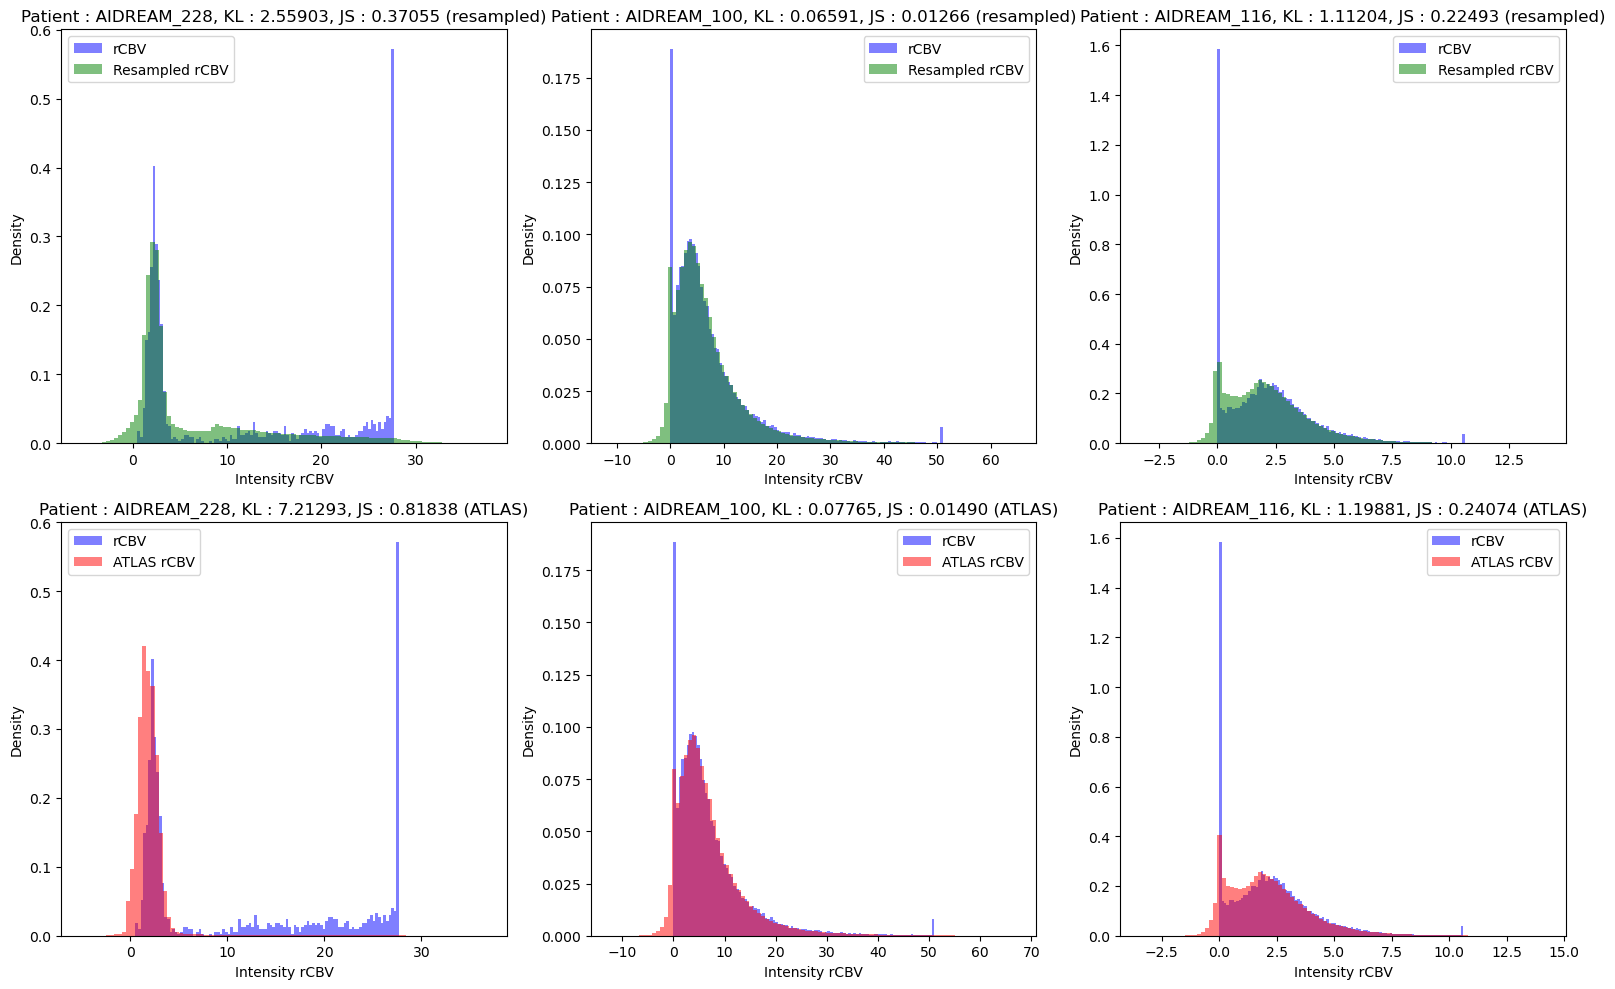

In [32]:
_, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, name in enumerate(["AIDREAM_228", "AIDREAM_100", "AIDREAM_116"]):

    # Create patient object :
    patient = CustomPadding(name)

    # Load the CTH, and its mask :
    cth = patient.get_biomarker("rCBV")
    mask_cth = get_mask(cth.numpy())
    cth_values = cth[mask_cth == 1].flatten()

    # Load the resampled CTH, and its mask :
    cth_resampled = patient.get_resampled_biomarker("rCBV")
    mask_cth_resampled = get_mask(cth_resampled.numpy())
    cth_resampled_values = cth_resampled[mask_cth_resampled == 1].flatten()

    # Load the ATLAS CTH, and its mask :
    atlas_cth = patient.get_atlas_biomarker("rCBV")
    mask_atlas_cth = get_mask(atlas_cth.numpy())
    atlas_cth_values = atlas_cth[mask_atlas_cth == 1].flatten()

    # Compute the histograms :
    hist_cth, bins_cth = np.histogram(cth_values, bins=100, density=True)
    hist_cth_resampled, _ = np.histogram(cth_resampled_values, bins=bins_cth, density=True)
    hist_atlas_cth, _ = np.histogram(atlas_cth_values, bins=bins_cth, density=True)

    # Avoid log(0) issues :
    epsilon = 1e-10
    hist_cth += epsilon
    hist_cth_resampled += epsilon
    hist_atlas_cth += epsilon

    # Compute the KL and JS divergences :
    kl_divergence_1 = compute_kl_divergence(hist_cth, hist_cth_resampled)
    kl_divergence_2 = compute_kl_divergence(hist_cth, hist_atlas_cth)
    js_divergence_1 = compute_js_divergence(hist_cth, hist_cth_resampled)
    js_divergence_2 = compute_js_divergence(hist_cth, hist_atlas_cth)

    # Plot the histograms :
    axes[0, i].hist(cth_values, bins=100, alpha=0.5, density=True, label="rCBV", color="b")
    axes[0, i].hist(cth_resampled_values, bins=100, alpha=0.5, density=True, label="Resampled rCBV", color="g")

    axes[1, i].hist(cth_values, bins=100, alpha=0.5, density=True, label="rCBV", color="b")
    axes[1, i].hist(atlas_cth_values, bins=100, alpha=0.5, density=True, label="ATLAS rCBV", color="r")

    # Add the title :
    axes[0, i].set_title(f"Patient : {name}, KL : {kl_divergence_1:.5f}, JS : {js_divergence_1:.5f} (resampled)")
    axes[0, i].set_xlabel("Intensity rCBV")
    axes[0, i].set_ylabel("Density")
    axes[0, i].legend()

    axes[1, i].set_title(f"Patient : {name}, KL : {kl_divergence_2:.5f}, JS : {js_divergence_2:.5f} (ATLAS)")
    axes[1, i].set_xlabel("Intensity rCBV")
    axes[1, i].set_ylabel("Density")
    axes[1, i].legend()

# Adjust the layout :
plt.tight_layout()
plt.show()


In [31]:
df_biomarkers_divergences.pivot_table(index="patient", columns="biomarker", values="KL", aggfunc="mean").sort_values("CTH", ascending=False).head(10)


biomarker,COV,CTH,Delay,OEF,rCBV,rCMRO2,rLeakage
patient,,,,,,,
AIDREAM_228,1.044429,3.844981,12.236831,8.432220,4.885983,0.185871,0.003577
AIDREAM_100,6.577984,0.814016,0.166286,21.870527,0.071780,0.011194,0.001043
AIDREAM_116,4.561581,0.641186,0.162975,23.159735,1.155424,0.178868,0.002262
AIDREAM_327,2.637223,0.434492,6.522297,12.371909,1.808175,0.203690,1604.959768
AIDREAM_113,3.882907,0.384075,3.426385,19.788187,1.280184,0.257839,NaN
AIDREAM_41,1.538539,0.374911,5.493471,11.907219,1.527860,0.229248,1584.292727
AIDREAM_306,3.762747,0.373300,7.396400,16.792684,1.525920,0.206989,2762.490620
AIDREAM_362,2.875358,0.363062,0.025384,13.714227,1.576876,0.208074,11.519038
AIDREAM_31,3.030110,0.341676,0.414879,13.171262,0.855603,0.091164,8.952577


In [30]:
df_biomarkers_divergences.loc[df_biomarkers_divergences["patient"] == "AIDREAM_152"]

,patient,biomarker,type,KL,JS
1484,AIDREAM_152,CTH,resampled,0.066657,0.015873
1485,AIDREAM_152,CTH,atlas,0.065928,0.015694
1486,AIDREAM_152,COV,resampled,1.034029,0.232651
1487,AIDREAM_152,COV,atlas,1.025530,0.233335
1488,AIDREAM_152,rCBV,resampled,1.049897,0.190321
1489,AIDREAM_152,rCBV,atlas,1.061607,0.190529
1490,AIDREAM_152,rCMRO2,resampled,0.136603,0.025423
1491,AIDREAM_152,rCMRO2,atlas,0.135776,0.025225
1492,AIDREAM_152,OEF,resampled,6.599677,1.452420
1493,AIDREAM_152,OEF,atlas,6.663806,1.462360


In [33]:
patient = CustomPadding("AIDREAM_228")

In [35]:
cth = patient.get_biomarker("CTH")

In [36]:
cth

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (128, 128, 20)
	 Spacing    : (1.875, 1.875, 5.5)
	 Origin     : (-124.374, -110.246, 12.7945)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [37]:
resampled_cth = patient.get_resampled_biomarker("CTH")
resampled_cth

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (512, 512, 220)
	 Spacing    : (0.4688, 0.4688, 0.5)
	 Origin     : (-124.374, -110.246, 12.7945)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

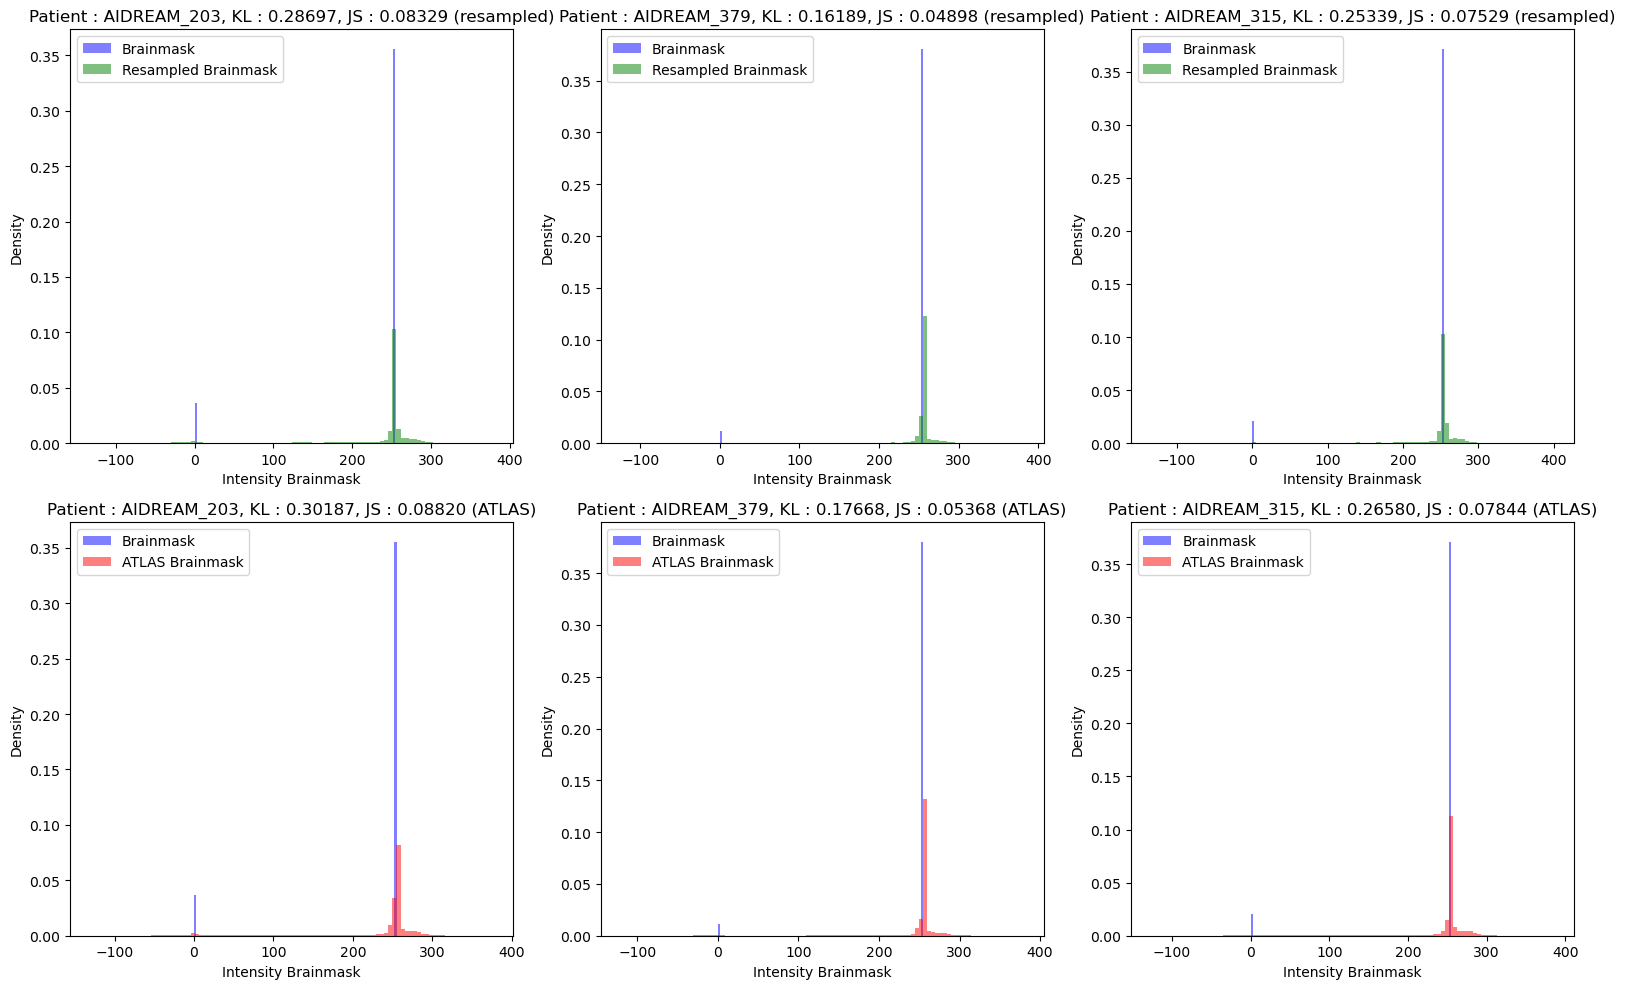

In [38]:
# Plot the histogram of the brainmask, the resampled brainmask, and the ATLAS brainmask for 3 random patients :
_, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, name in enumerate(selected_patients):

    # Create patient object :
    patient = CustomPadding(name)

    # Load the brainmask, and its mask :
    brainmask = patient.get_biomarker("brainmask")
    mask_brainmask = get_mask(brainmask.numpy())
    brainmask_values = brainmask[mask_brainmask == 1].flatten()

    # Load the resampled brainmask, and its mask :
    brainmask_resampled = patient.get_resampled_biomarker("brainmask")
    mask_brainmask_resampled = get_mask(brainmask_resampled.numpy())
    brainmask_resampled_values = brainmask_resampled[mask_brainmask_resampled == 1].flatten()

    # Load the ATLAS brainmask, and its mask :
    atlas_brainmask = patient.get_atlas_biomarker("brainmask")
    mask_atlas_brainmask = get_mask(atlas_brainmask.numpy())
    atlas_brainmask_values = atlas_brainmask[mask_atlas_brainmask == 1].flatten()

    # Compute the histograms :
    hist_brainmask, bins_brainmask = np.histogram(brainmask_values, bins=100, density=True)
    hist_brainmask_resampled, _ = np.histogram(brainmask_resampled_values, bins=bins_brainmask, density=True)
    hist_atlas_brainmask, _ = np.histogram(atlas_brainmask_values, bins=bins_brainmask, density=True)

    # Avoid log(0) issues :
    epsilon = 1e-10
    hist_brainmask += epsilon
    hist_brainmask_resampled += epsilon
    hist_atlas_brainmask += epsilon

    # Compute the KL and JS divergences :
    kl_divergence_1 = compute_kl_divergence(hist_brainmask, hist_brainmask_resampled)
    kl_divergence_2 = compute_kl_divergence(hist_brainmask, hist_atlas_brainmask)

    js_divergence_1 = compute_js_divergence(hist_brainmask, hist_brainmask_resampled)
    js_divergence_2 = compute_js_divergence(hist_brainmask, hist_atlas_brainmask)

    # Plot the histograms :
    axes[0, i].hist(brainmask_values, bins=100, alpha=0.5, density=True, label="Brainmask", color="b")
    axes[0, i].hist(brainmask_resampled_values, bins=100, alpha=0.5, density=True, label="Resampled Brainmask", color="g")

    axes[1, i].hist(brainmask_values, bins=100, alpha=0.5, density=True, label="Brainmask", color="b")
    axes[1, i].hist(atlas_brainmask_values, bins=100, alpha=0.5, density=True, label="ATLAS Brainmask", color="r")

    # Add the title :
    axes[0, i].set_title(f"Patient : {name}, KL : {kl_divergence_1:.5f}, JS : {js_divergence_1:.5f} (resampled)")
    axes[0, i].set_xlabel("Intensity Brainmask")
    axes[0, i].set_ylabel("Density")
    axes[0, i].legend()

    axes[1, i].set_title(f"Patient : {name}, KL : {kl_divergence_2:.5f}, JS : {js_divergence_2:.5f} (ATLAS)")
    axes[1, i].set_xlabel("Intensity Brainmask")
    axes[1, i].set_ylabel("Density")
    axes[1, i].legend()

# Adjust the layout :
plt.tight_layout()
plt.show()



In [ ]:
# Compute the KL and JS divergences for all patients for the brainmask :
df_brainmask_divergences = pd.DataFrame(columns=["patient", "KL", "JS"])

for i, name in enumerate(list_patients):

    # Create patient object :
    patient = CustomPadding(name)

    # Load the brainmask, and its mask :
    brainmask = patient.get_biomarker("brainmask")

    # Load the resampled brainmask, and its mask :
    brainmask_resampled = patient.get_resampled_biomarker("brainmask")
